## Different Model Validation

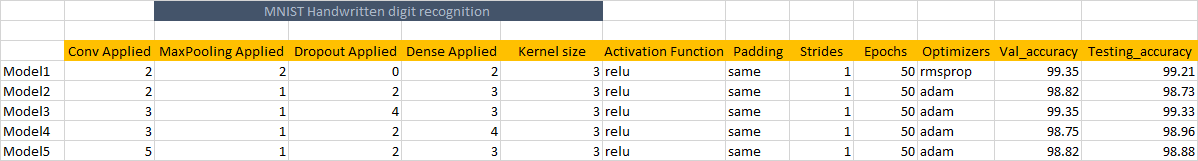

## Coding Part

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data

In [2]:
mnist_data = tf.keras.datasets.mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist_data.load_data()

In [4]:
print(f"the training size is {len(X_train)}")
print(f"the testing size is {len(X_test)}")

the training size is 60000
the testing size is 10000


Visualization of data

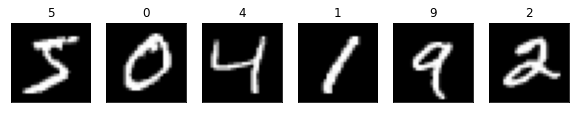

In [5]:
fig = plt.figure(figsize=(10,10))
for i in range(6):
  ax = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
  ax.imshow(X_train[i],cmap='gray')
  ax.set_title(str(y_train[i]))

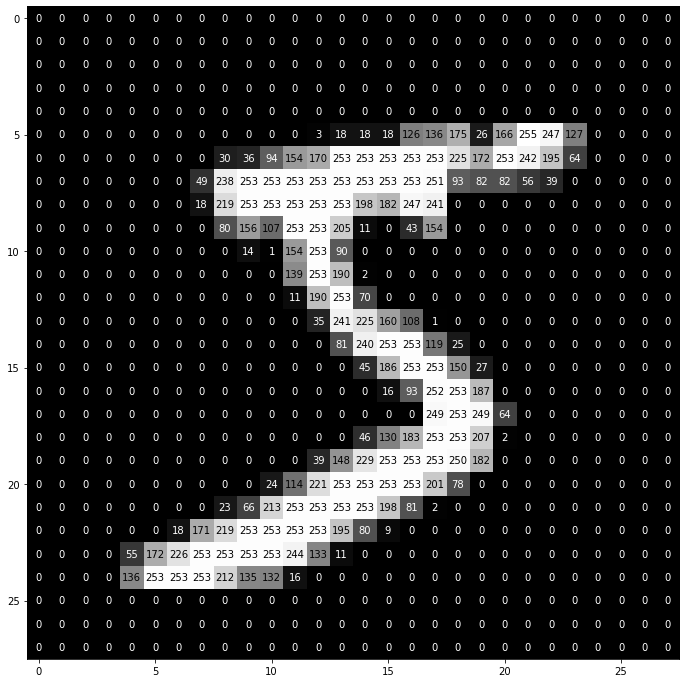

In [6]:
## creating hearmap
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

 Preprocess input images: Rescale the Images by Dividing Every Pixel in Every Image by 255


In [7]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


Preprocess the labels: Encode Categorical Integer Labels Using a One-Hot Scheme

In [8]:
from keras.utils import np_utils

num_classes = 10
# print first ten training labels
print("integer class lables: ")
print(y_train[:10])

# one-hot encode the labels
# convert class vectors to binary class matrices

y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

# print first ten (one-hot) training labels
print("Encooded values are :")
print(y_train[:10])

integer class lables: 
[5 0 4 1 9 2 1 3 1 4]
Encooded values are :
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Reshape data to fit our CNN (and input_shape)

In [9]:
img_row, img_col = 28, 28

X_train = X_train.reshape(X_train.shape[0],img_row,img_col,1)
X_test = X_test.reshape(X_test.shape[0],img_row,img_col,1)
input_shape = (img_row, img_col, 1)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


# Defining 5 different type of models:

### Model1

In [10]:

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation ='relu' ,input_shape=(28,28,1)))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(units=32,activation='relu'))
model1.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                100384    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [11]:
## compile the model
model1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [12]:
## creating checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint   

## train the model

chkpointer = ModelCheckpoint(filepath='model1.weights.best.hdf5', verbose=1, save_best_only=True)

history1 = model1.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=[chkpointer],verbose=2,shuffle=True)


Epoch 1/50
1875/1875 - 10s - loss: 0.1650 - accuracy: 0.9510 - val_loss: 0.0518 - val_accuracy: 0.9826

Epoch 00001: val_loss improved from inf to 0.05175, saving model to model1.weights.best.hdf5
Epoch 2/50
1875/1875 - 8s - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0347 - val_accuracy: 0.9885

Epoch 00002: val_loss improved from 0.05175 to 0.03470, saving model to model1.weights.best.hdf5
Epoch 3/50
1875/1875 - 8s - loss: 0.0333 - accuracy: 0.9899 - val_loss: 0.0361 - val_accuracy: 0.9886

Epoch 00003: val_loss did not improve from 0.03470
Epoch 4/50
1875/1875 - 8s - loss: 0.0277 - accuracy: 0.9917 - val_loss: 0.0246 - val_accuracy: 0.9921

Epoch 00004: val_loss improved from 0.03470 to 0.02463, saving model to model1.weights.best.hdf5
Epoch 5/50
1875/1875 - 8s - loss: 0.0218 - accuracy: 0.9937 - val_loss: 0.0259 - val_accuracy: 0.9924

Epoch 00005: val_loss did not improve from 0.02463
Epoch 6/50
1875/1875 - 8s - loss: 0.0189 - accuracy: 0.9945 - val_loss: 0.0281 - val_accuracy: 

In [13]:
# load the weights that yielded the best validation accuracy
model1.load_weights('model1.weights.best.hdf5')

In [14]:
# evaluate test accuracy
score = model1.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.2100%


### Model2

In [15]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation ='relu' ,input_shape=(28,28,1)))
model2.add(tf.keras.layers.Dropout(rate=0.3))
model2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units=32,activation='relu'))
model2.add(tf.keras.layers.Dense(units=64,activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=0.4))
model2.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                401440    
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [16]:
## compile the model
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
## creating checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint   

## train the model

chkpointer = ModelCheckpoint(filepath='model2.weights.best.hdf5', verbose=1, save_best_only=True)

history2 = model2.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=[chkpointer],verbose=2,shuffle=True)


Epoch 1/50
1875/1875 - 15s - loss: 0.2467 - accuracy: 0.9269 - val_loss: 0.0613 - val_accuracy: 0.9815

Epoch 00001: val_loss improved from inf to 0.06135, saving model to model2.weights.best.hdf5
Epoch 2/50
1875/1875 - 14s - loss: 0.0766 - accuracy: 0.9788 - val_loss: 0.0507 - val_accuracy: 0.9830

Epoch 00002: val_loss improved from 0.06135 to 0.05075, saving model to model2.weights.best.hdf5
Epoch 3/50
1875/1875 - 14s - loss: 0.0552 - accuracy: 0.9846 - val_loss: 0.0382 - val_accuracy: 0.9873

Epoch 00003: val_loss improved from 0.05075 to 0.03825, saving model to model2.weights.best.hdf5
Epoch 4/50
1875/1875 - 14s - loss: 0.0429 - accuracy: 0.9880 - val_loss: 0.0432 - val_accuracy: 0.9872

Epoch 00004: val_loss did not improve from 0.03825
Epoch 5/50
1875/1875 - 14s - loss: 0.0351 - accuracy: 0.9898 - val_loss: 0.0398 - val_accuracy: 0.9862

Epoch 00005: val_loss did not improve from 0.03825
Epoch 6/50
1875/1875 - 14s - loss: 0.0283 - accuracy: 0.9920 - val_loss: 0.0396 - val_accur

In [18]:
# load the weights that yielded the best validation accuracy
model2.load_weights('model2.weights.best.hdf5')

In [19]:
# evaluate test accuracy
score = model2.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.7300%


### Model3

In [20]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation ='relu' ,input_shape=(28,28,1)))
model3.add(tf.keras.layers.Dropout(rate=0.3))
model3.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Dropout(rate=0.3))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(units=32,activation='relu'))
model3.add(tf.keras.layers.Dropout(rate=0.3))
model3.add(tf.keras.layers.Dense(units=64,activation='relu'))
model3.add(tf.keras.layers.Dropout(rate=0.4))
model3.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)            

In [21]:
## compile the model
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
## creating checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint   

## train the model

chkpointer = ModelCheckpoint(filepath='model3.weights.best.hdf5', verbose=1, save_best_only=True)

history3 = model3.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=[chkpointer],verbose=2,shuffle=True)


Epoch 1/50
1875/1875 - 29s - loss: 0.4489 - accuracy: 0.8534 - val_loss: 0.0782 - val_accuracy: 0.9774

Epoch 00001: val_loss improved from inf to 0.07824, saving model to model3.weights.best.hdf5
Epoch 2/50
1875/1875 - 27s - loss: 0.2198 - accuracy: 0.9293 - val_loss: 0.0453 - val_accuracy: 0.9859

Epoch 00002: val_loss improved from 0.07824 to 0.04529, saving model to model3.weights.best.hdf5
Epoch 3/50
1875/1875 - 27s - loss: 0.1659 - accuracy: 0.9480 - val_loss: 0.0412 - val_accuracy: 0.9880

Epoch 00003: val_loss improved from 0.04529 to 0.04118, saving model to model3.weights.best.hdf5
Epoch 4/50
1875/1875 - 27s - loss: 0.1355 - accuracy: 0.9564 - val_loss: 0.0389 - val_accuracy: 0.9882

Epoch 00004: val_loss improved from 0.04118 to 0.03885, saving model to model3.weights.best.hdf5
Epoch 5/50
1875/1875 - 27s - loss: 0.1242 - accuracy: 0.9600 - val_loss: 0.0334 - val_accuracy: 0.9904

Epoch 00005: val_loss improved from 0.03885 to 0.03343, saving model to model3.weights.best.hdf5

In [23]:
# load the weights that yielded the best validation accuracy
model3.load_weights('model3.weights.best.hdf5')

In [24]:
# evaluate test accuracy
score = model3.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.3300%


### Model4

In [25]:
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation ='relu' ,input_shape=(28,28,1)))
model4.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model4.add(tf.keras.layers.Dropout(rate=0.2))
model4.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'))
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(units=32,activation='relu'))
model4.add(tf.keras.layers.Dense(units=64,activation='relu'))
model4.add(tf.keras.layers.Dense(units=16,activation='relu'))
model4.add(tf.keras.layers.Dropout(rate=0.5))
model4.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)        9232      
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)               

In [26]:
## compile the model
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
## creating checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint   

## train the model

chkpointer = ModelCheckpoint(filepath='model4.weights.best.hdf5', verbose=1, save_best_only=True)

history4 = model4.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=[chkpointer],verbose=2,shuffle=True)


Epoch 1/50
1875/1875 - 16s - loss: 0.5867 - accuracy: 0.7922 - val_loss: 0.0870 - val_accuracy: 0.9792

Epoch 00001: val_loss improved from inf to 0.08697, saving model to model4.weights.best.hdf5
Epoch 2/50
1875/1875 - 15s - loss: 0.3454 - accuracy: 0.8806 - val_loss: 0.0733 - val_accuracy: 0.9831

Epoch 00002: val_loss improved from 0.08697 to 0.07326, saving model to model4.weights.best.hdf5
Epoch 3/50
1875/1875 - 15s - loss: 0.3011 - accuracy: 0.8871 - val_loss: 0.0607 - val_accuracy: 0.9862

Epoch 00003: val_loss improved from 0.07326 to 0.06074, saving model to model4.weights.best.hdf5
Epoch 4/50
1875/1875 - 15s - loss: 0.2734 - accuracy: 0.8967 - val_loss: 0.0570 - val_accuracy: 0.9879

Epoch 00004: val_loss improved from 0.06074 to 0.05703, saving model to model4.weights.best.hdf5
Epoch 5/50
1875/1875 - 15s - loss: 0.2660 - accuracy: 0.8981 - val_loss: 0.0651 - val_accuracy: 0.9872

Epoch 00005: val_loss did not improve from 0.05703
Epoch 6/50
1875/1875 - 15s - loss: 0.2547 - a

In [28]:
# load the weights that yielded the best validation accuracy
model4.load_weights('model4.weights.best.hdf5')

In [29]:
# evaluate test accuracy
score = model4.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.9600%


### Model5

In [30]:
model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation ='relu' ,input_shape=(28,28,1)))
model5.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model5.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model5.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'))
model5.add(tf.keras.layers.Conv2D(filters=4,kernel_size=(3,3),padding='same',activation='relu'))
model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(units=32,activation='relu'))
model5.add(tf.keras.layers.Dense(units=16,activation='relu'))
model5.add(tf.keras.layers.Dropout(rate=0.5))
model5.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 16)        18448     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 4)        

In [31]:
## compile the model
model5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
## creating checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint   

## train the model

chkpointer = ModelCheckpoint(filepath='model5.weights.best.hdf5', verbose=1, save_best_only=True)

history5 = model5.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=[chkpointer],verbose=2,shuffle=True)


Epoch 1/50
1875/1875 - 29s - loss: 0.6563 - accuracy: 0.7621 - val_loss: 0.1135 - val_accuracy: 0.9704

Epoch 00001: val_loss improved from inf to 0.11355, saving model to model5.weights.best.hdf5
Epoch 2/50
1875/1875 - 28s - loss: 0.3794 - accuracy: 0.8650 - val_loss: 0.0702 - val_accuracy: 0.9809

Epoch 00002: val_loss improved from 0.11355 to 0.07023, saving model to model5.weights.best.hdf5
Epoch 3/50
1875/1875 - 28s - loss: 0.3224 - accuracy: 0.8856 - val_loss: 0.0679 - val_accuracy: 0.9851

Epoch 00003: val_loss improved from 0.07023 to 0.06791, saving model to model5.weights.best.hdf5
Epoch 4/50
1875/1875 - 28s - loss: 0.3042 - accuracy: 0.8925 - val_loss: 0.0669 - val_accuracy: 0.9850

Epoch 00004: val_loss improved from 0.06791 to 0.06685, saving model to model5.weights.best.hdf5
Epoch 5/50
1875/1875 - 28s - loss: 0.2872 - accuracy: 0.8984 - val_loss: 0.0662 - val_accuracy: 0.9853

Epoch 00005: val_loss improved from 0.06685 to 0.06620, saving model to model5.weights.best.hdf5

In [33]:
# load the weights that yielded the best validation accuracy
model5.load_weights('model5.weights.best.hdf5')

In [34]:
# evaluate test accuracy
score = model5.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.8800%
